In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np

import time

import math

# > DESCRIÇÃO DA TAREFA
## 1. Contar o número de operações dos algoritmos de ordenação por projeção e contagem
## 2. Achar a complexidade em tempo desse algoritmo
## 3. Medir o tempo em função de n
## 4. Comparar (plotar) a curva experimental com a curva teórica calibrada

# > CONFIGURAÇÃO DO PROBLEMA

In [2]:
# ALGORITMO inknown sort (para float !)

def bucket_sort(d): # otimizado
    n = len(d)
    m = min(d)
    M = max(d)

    # Cria os buckets vazios
    num_buckets = n 
    buckets = [[] for _ in range(num_buckets)]

    # Distribui os elementos nos buckets
    for num in d:
        index = math.trunc((n-1) * (num - m) / (M - m))
        buckets[index].append(num)

    # Ordena cada bucket separadamente usando o método sort()
    for bucket in buckets:
        if len(bucket)>0:
            insertion_sort(bucket)    
#             bucket.sort() # usa algum método para ordenar cada bucket
    # Concatena os elementos dos buckets em um único array
#    pythonic way: sorted_arr = [num for bucket in buckets for num in bucket]
#    normal way
    sorted_arr = []
    for bucket in buckets:
        for num in bucket:
            sorted_arr.append(num)
    
    return sorted_arr

# Algoritmo de ordenação auxiliar: Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [3]:
# test
# Exemplo de uso:
array = [12, 11, 13, 5, 6, 7]
print(array)
resultado = bucket_sort(array)
print(resultado)

[12, 11, 13, 5, 6, 7]
[5, 6, 7, 11, 12, 13]


In [4]:
# calculo do tempo em função de n

#-----------------------------------------------------

T=[] # tempos medios para cada valor de n
n_val=[] # valores de n analisados

# Y , X valores de tempo e n dos experimentos para scatter plots
Y =[] 
X =[]
mn=100
Mn=1200
stpn = 200

for n in range(mn,Mn,stpn):

    print("n ",n)
    t=[]

    rep = int(n) # rep crescente - qto maior n, mais repetições são necessárias -> economiza tempo do teste
#     rep=1
    
    for r in range(rep):
        d=np.random.uniform(1,int(5*n),n) #.astype('int') # minimo, maximo, num. classes < diferentes arquivos em cada ordenação
#         print(d)
        tic=time.time()
        a = bucket_sort(d)
        toc=time.time()
        t.append(toc-tic)
        Y.append(toc-tic)
        X.append(n)
    T.append(np.mean(t))
    n_val.append(n)
    

n  100
n  300
n  500
n  700
n  900
n  1100


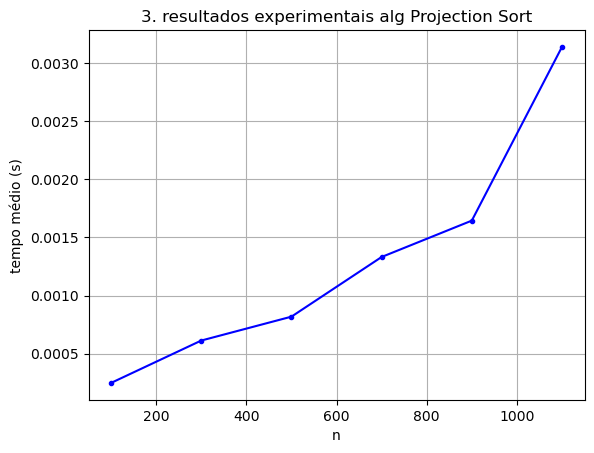

In [5]:
# plot
plt.plot(n_val,T,'b.-')
plt.title("3. resultados experimentais alg Projection Sort")
plt.xlabel('n')
plt.ylabel('tempo médio (s)')
plt.grid()
plt.show()

In [6]:
# Avaliação da predição teórica

def analytical_formula():
    # escrever a formula para Ntheo = numero total de operações (a+0+c) e para a complexidade
    
    return Ntheo, Complex

n_value=[]
Th=[]
Tc=[]

for N in range(mn,Mn,stpn): # tarefa 4
    n_value.append(N)
    Ntheo, Complex = analytical_formula(N)
    Th.append(Ntheo) # número de operações
    Tc.append(Complex)
    
# calibração

K=Th[-1]/T[-1]
print("5. número de operações por segundo:",int(K/1e6),"MFLOPS")
# plot
plt.plot(n_value,1/K*np.array(Th),'r.-')
# Kc=Tc[-1]/T[-1]
# print("5A. número de operações por segundo por complexidade :",int(Kc/1e6),"MFLOPS")
# # plot
# plt.plot(n_value,1/Kc*np.array(Tc),'k.-')
plt.plot(n_val,T,'b.-')
plt.title("6. resultados experimentais vs teóricos alg Insert Sort")
plt.xlabel('n')
plt.ylabel('tempo médio (s)')
plt.legend(['teórico','experimental'])
plt.grid()
plt.show()

TypeError: analytical_formula() takes 0 positional arguments but 1 was given

In [ ]:
# erro quadrático médio 
MSE = np.sum(np.power(np.array(T)-np.array(Th/K),2))/len(T)
print('Mean Square Error - MSE=',"{:3.2g}".format(MSE),'(s^2)')
RMSE = np.sqrt(MSE)
print('Root of Mean Square Erro - RMSE=',"{:6.5f}".format(RMSE),'(s)')
NRMSE = RMSE/np.mean(Th/K)
print('Globally Normalized Root of Mean Square Erro (%) - GNRMSE=',"{:3.2f}".format(100*NRMSE),'%')
s=0
for i in range(len(T)):
    s+=np.power(K*(T[i]-Th[i]/K)/Th[i],2) 
s/=len(n_val)
LNRMSE = np.sqrt(s)
print('Locally Normalized Root of Mean Square Erro (%) - LNRMSE=',"{:3.2f}".format(100*LNRMSE),'%')